In [17]:
pip install yfinance pandas matplotlib requests bs4 plotly mplfinance 

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [21]:
start_date = '2016-01-01'
end_date = '2024-11-09'

In [22]:
dates = pd.date_range(start=start_date, end=end_date).astype(str)
dates_df = pd.DataFrame({'Date': dates}).reset_index(drop=True)

dates_df['Date'] = dates_df['Date'].astype(str)
dates_df

,Date
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
3231,2024-11-05
3232,2024-11-06
3233,2024-11-07
3234,2024-11-08


# 1. Tesla Data

In [48]:
# Define the ticker symbol for Tesla
tesla_ticker = 'TSLA'

# Download Tesla stock data
# tesla_stock_data = yf.download(tesla_ticker, start=start_date, end=end_date)
tesla = yf.Ticker('TSLA')
tesla_stock_data = tesla.history(period='max')

# This also works for single-level columns, so it's a safe operation
#tesla_stock_data.columns = [col[0] for col in tesla_stock_data.columns] 

tesla_stock_data.reset_index(inplace=True)  # Make 'Date' a column if it's currently the index
# tesla_stock_data.set_index('Date', inplace=True)
tesla_stock_df = tesla_stock_data
# tesla_stock_df.index = tesla_stock_df.index.astype(str)
# tesla_stock_df.index = tesla_stock_df.index.str[:10]
tesla_stock_df['Date'] = tesla_stock_df['Date'].astype(str)
tesla_stock_df['Date'] = tesla_stock_df['Date'].str[:10]


# tesla_stock_df = pd.merge(dates_df, tesla_stock_df, on='Date', how='left')
# tesla_stock_df = tesla_stock_df.ffill()
# tesla_stock_df = tesla_stock_df.fillna(0)

tesla_stock_df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [63]:
def make_graph(stock_data, title="Stock Price Over Time"):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label="Close Price", color="blue")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price in USD")
    plt.legend()
    plt.show()

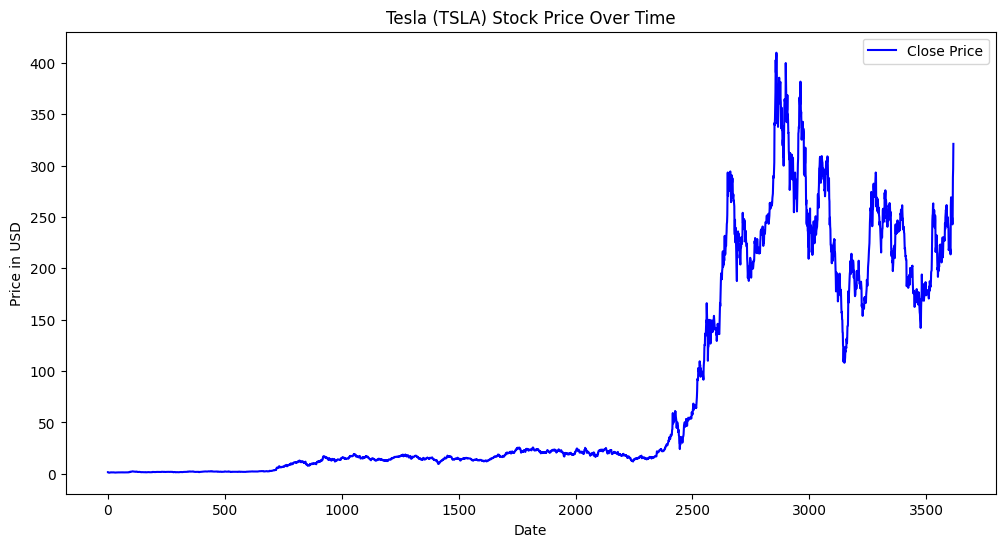

In [64]:
make_graph(tesla_stock_df, title="Tesla (TSLA) Stock Price Over Time")


In [50]:
# import pandas as pd
# import mplfinance as mpf

# mpf.plot(tesla_stock_df, type='candle', style='charles', volume=False)

import plotly.graph_objects as go

# Assuming tesla_revenue_df is your DataFrame and it has columns 'Date' and 'Revenue'
fig = go.Figure(data=go.Scatter(x=tesla_stock_df['Date'], y=tesla_stock_df['Close']))
fig.update_layout(title='Tesla Stock Adj. Close Price',
                   xaxis_title='Date',
                   yaxis_title='Price')
fig.show()

In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for Tesla's revenue data (use a site like MacroTrends if available)
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
}

# Send a GET request
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Parse revenue data (this will depend on the structure of the page)
# Here we're using a table with class 'historical_data_table' as an example
revenue_data = []
table = soup.find_all('table', {'class': 'historical_data_table'})[1]

for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace('$', '').replace(',', '')
        revenue_data.append([date, float(revenue) if revenue else None])

# Create a DataFrame
tesla_revenue_df = pd.DataFrame(revenue_data, columns=['Date', 'Revenue']).fillna(0)

mask = (tesla_revenue_df['Date'] >= start_date) & (tesla_revenue_df['Date'] <= end_date)
# tesla_revenue_df = tesla_revenue_df.loc[mask]
# tesla_revenue_df.dtypes

tesla_revenue_df.tail(5)

# tesla_revenue_df = pd.merge(pd.DataFrame(dates, columns=['Date']), tesla_revenue_df, on='Date', how='left')
# tesla_revenue_df['Revenue'] = tesla_revenue_df['Revenue'].ffill()



,Date,Revenue
57,2010-06-30,28.0
58,2010-03-31,21.0
59,2009-12-31,0.0
60,2009-09-30,46.0
61,2009-06-30,27.0


In [58]:
revenue_data = []
table = soup.find_all('table', {'class': 'historical_data_table'})[0]

for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace('$', '').replace(',', '')
        revenue_data.append([date, float(revenue) if revenue else None])

# Create a DataFrame
tesla_revenue_df = pd.DataFrame(revenue_data, columns=['Date', 'Revenue']).fillna(0)

mask = (tesla_revenue_df['Date'] >= start_date) & (tesla_revenue_df['Date'] <= end_date)

tesla_revenue_df.tail(5)

,Date,Revenue
10,2013,2013.0
11,2012,413.0
12,2011,204.0
13,2010,117.0
14,2009,112.0


In [26]:
import plotly.graph_objects as go

# Assuming tesla_revenue_df is your DataFrame and it has columns 'Date' and 'Revenue'
fig = go.Figure(data=go.Scatter(x=tesla_revenue_df['Date'], y=tesla_revenue_df['Revenue']))
fig.update_layout(title='Tesla Quarterly Revenue',
                   xaxis_title='Date',
                   yaxis_title='Revenue')
fig.show()

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is your DataFrame and it has columns 'Date', 'Series1', and 'Series2'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=tesla_stock_df['Date'], y=tesla_stock_df['Adj Close'], name="Tesla Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=tesla_revenue_df['Date'], y=tesla_revenue_df['Revenue'], name="Tesla Revenue Quarterly"),
    secondary_y=True,
)

fig.update_layout(
    title_text="Tesla Price vs Revenues (Q)"
)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Price", secondary_y=False)
fig.update_yaxes(title_text="Revenue", secondary_y=True)

fig.show()

# 2. GameStop Data

In [35]:
# Define the ticker symbol for Tesla
gamestop_ticker = 'GME'

# Download Tesla stock data
gamestop_stock_data = yf.download(gamestop_ticker, start=start_date, end=end_date)

# This also works for single-level columns, so it's a safe operation
gamestop_stock_data.columns = [col[0] for col in gamestop_stock_data.columns] 

gamestop_stock_data.reset_index(inplace=True)  # Make 'Date' a column if it's currently the index
gamestop_stock_data.set_index('Date', inplace=True)
gamestop_stock_df = gamestop_stock_data
gamestop_stock_df.index = gamestop_stock_df.index.astype(str)
gamestop_stock_df.index = gamestop_stock_df.index.str[:10]


gamestop_stock_df = pd.merge(dates_df, gamestop_stock_df, on='Date', how='left')
gamestop_stock_df = gamestop_stock_df.ffill()
gamestop_stock_df = gamestop_stock_df.fillna(0)

gamestop_stock_df.head(6)

[*********************100%***********************]  1 of 1 completed


,Date,Adj Close,Close,High,Low,Open,Volume
0,2016-01-01,0.000000,0.0000,0.0000,0.0000,0.0000,0.0
1,2016-01-02,0.000000,0.0000,0.0000,0.0000,0.0000,0.0
2,2016-01-03,0.000000,0.0000,0.0000,0.0000,0.0000,0.0
3,2016-01-04,5.462200,7.0775,7.1150,6.7525,6.7600,17321600.0
4,2016-01-05,5.550955,7.1925,7.2525,7.0150,7.1475,13666400.0
5,2016-01-06,5.473777,7.0925,7.1850,6.8600,7.0575,15025600.0


In [52]:
gamestop = yf.Ticker(gamestop_ticker)
gamestop_stock_data = gamestop.history(period='max')

# This also works for single-level columns, so it's a safe operation
#tesla_stock_data.columns = [col[0] for col in tesla_stock_data.columns] 

gamestop_stock_data.reset_index(inplace=True)  # Make 'Date' a column if it's currently the index
# tesla_stock_data.set_index('Date', inplace=True)
gamestop_stock_data = gamestop_stock_data
# tesla_stock_df.index = tesla_stock_df.index.astype(str)
# tesla_stock_df.index = tesla_stock_df.index.str[:10]
gamestop_stock_data['Date'] = gamestop_stock_data['Date'].astype(str)
gamestop_stock_data['Date'] = gamestop_stock_data['Date'].str[:10]


# tesla_stock_df = pd.merge(dates_df, tesla_stock_df, on='Date', how='left')
# tesla_stock_df = tesla_stock_df.ffill()
# tesla_stock_df = tesla_stock_df.fillna(0)

gamestop_stock_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


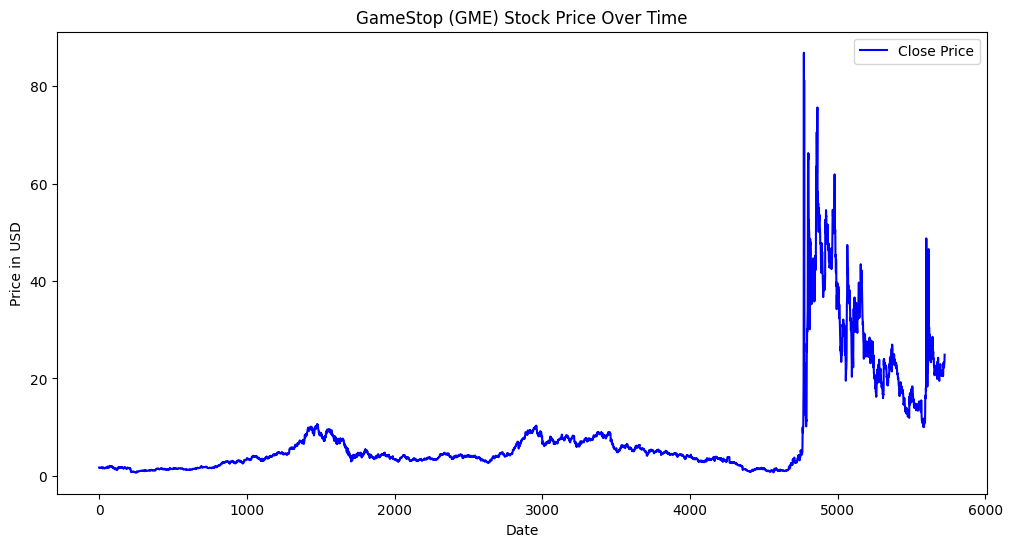

In [65]:
make_graph(gamestop_stock_data, title="GameStop (GME) Stock Price Over Time")

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for Tesla's revenue data (use a site like MacroTrends if available)
url = 'https://www.macrotrends.net/stocks/charts/GME/tesla/revenue'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
}

# Send a GET request
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Parse revenue data (this will depend on the structure of the page)
# Here we're using a table with class 'historical_data_table' as an example
revenue_data = []
table = soup.find_all('table', {'class': 'historical_data_table'})[1]

response

for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace('$', '').replace(',', '')
        revenue_data.append([date, float(revenue) if revenue else None])

# Create a DataFrame
gamestop_revenue_df = pd.DataFrame(revenue_data, columns=['Date', 'Revenue']).fillna(0)

mask = (gamestop_revenue_df['Date'] >= start_date) & (gamestop_revenue_df['Date'] <= end_date)
# tesla_revenue_df = tesla_revenue_df.loc[mask]
# tesla_revenue_df.dtypes

gamestop_revenue_df.tail(5)

# gamestop_revenue_df = pd.merge(pd.DataFrame(dates, columns=['Date']), gamestop_revenue_df, on='Date', how='left')
# gamestop_revenue_df['Revenue'] = gamestop_revenue_df['Revenue'].ffill()

,Date,Revenue
58,2010-01-31,3524.0
59,2009-10-31,1835.0
60,2009-07-31,1739.0
61,2009-04-30,1981.0
62,2009-01-31,3492.0


In [56]:
revenue_data = []
table = soup.find_all('table', {'class': 'historical_data_table'})[0]

for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace('$', '').replace(',', '')
        revenue_data.append([date, float(revenue) if revenue else None])

# Create a DataFrame
tesla_revenue_df = pd.DataFrame(revenue_data, columns=['Date', 'Revenue']).fillna(0)

mask = (tesla_revenue_df['Date'] >= start_date) & (tesla_revenue_df['Date'] <= end_date)

tesla_revenue_df.tail(5)

,Date,Revenue
11,2013,8887.0
12,2012,9551.0
13,2011,9474.0
14,2010,9078.0
15,2009,8806.0


In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is your DataFrame and it has columns 'Date', 'Series1', and 'Series2'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=gamestop_stock_df['Date'], y=gamestop_stock_df['Adj Close'], name="GME Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=gamestop_revenue_df['Date'], y=gamestop_revenue_df['Revenue'], name="GME Revenue Quarterly"),
    secondary_y=True,
)

fig.update_layout(
    title_text="GME Price vs Revenues (Q)"
)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Price", secondary_y=False)
fig.update_yaxes(title_text="Revenue", secondary_y=True)

fig.show()

In [37]:
fig = go.Figure(data=go.Scatter(x=gamestop_stock_df['Date'], y=gamestop_stock_df['Adj Close']))
fig.update_layout(title='GME Stock Adj. Close Price',
                   xaxis_title='Date',
                   yaxis_title='Price')
fig.show()